# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization



In [3]:
!pip install pystan

In [4]:
!pip install prophet
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [8]:
df = pd.read_csv("TSLA.csv")

In [6]:
#read_csv function from pandas

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-26,16.433332,16.445333,15.408667,15.676000,15.676000,335410500
1,2019-04-29,15.724000,16.265333,15.478000,16.098000,16.098000,250717500
2,2019-04-30,16.137333,16.280666,15.800000,15.912667,15.912667,141969000
3,2019-05-01,15.923333,16.000000,15.433333,15.600667,15.600667,160566000
4,2019-05-02,16.368000,16.475332,15.848000,16.273333,16.273333,272389500
...,...,...,...,...,...,...,...
1255,2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
1256,2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
1257,2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
1258,2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,125810700


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,181.506612,185.555609,177.135192,181.442839,181.442839,1.321156e+08
std,101.240867,103.373026,98.802477,101.078989,101.078989,8.432359e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,99.633669,102.268997,97.383333,99.679335,99.679335,8.037720e+07
50%,203.068336,207.894996,198.500000,203.313332,203.313332,1.075573e+08
75%,251.277500,256.536659,246.177498,251.694996,251.694996,1.531997e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [7]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [12]:
px.area(df, x="Date", y="Close")

In [13]:
px.line(df, x="Date", y="Close")

In [14]:
px.area(df, x="Date", y="Volume")

In [15]:
px.bar(df, y="Close")

In [16]:
px.box(df, y="Close")

# Understanding Facebook Prophet

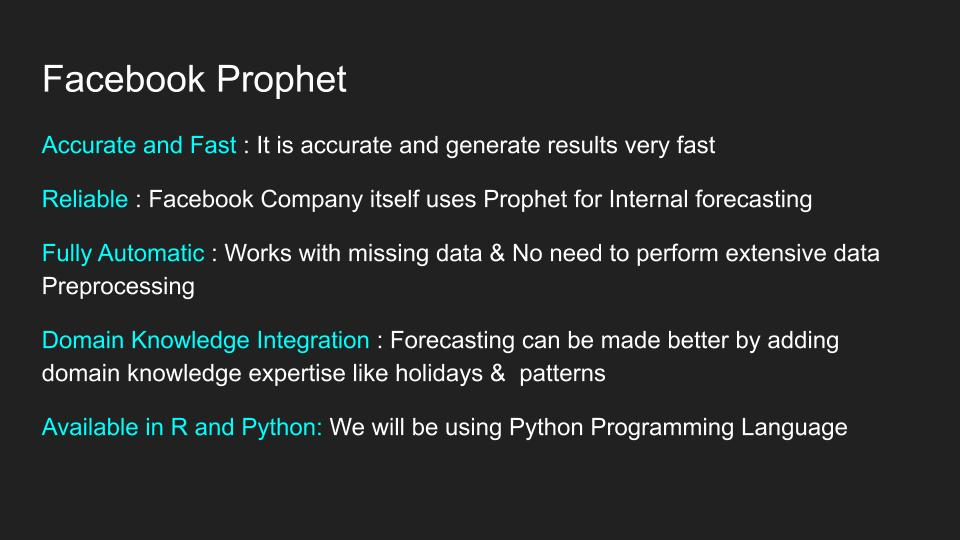

## Data Preperation

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-26,16.433332,16.445333,15.408667,15.676000,15.676000,335410500
1,2019-04-29,15.724000,16.265333,15.478000,16.098000,16.098000,250717500
2,2019-04-30,16.137333,16.280666,15.800000,15.912667,15.912667,141969000
3,2019-05-01,15.923333,16.000000,15.433333,15.600667,15.600667,160566000
4,2019-05-02,16.368000,16.475332,15.848000,16.273333,16.273333,272389500
...,...,...,...,...,...,...,...
1255,2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
1256,2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
1257,2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
1258,2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,125810700


In [18]:
columns = ["Date", "Close"]
ndf = pd.DataFrame(df, columns = columns)

In [19]:
ndf

,Date,Close
0,2019-04-26,15.676000
1,2019-04-29,16.098000
2,2019-04-30,15.912667
3,2019-05-01,15.600667
4,2019-05-02,16.273333
...,...,...
1255,2024-04-22,142.050003
1256,2024-04-23,144.679993
1257,2024-04-24,162.130005
1258,2024-04-25,170.179993


In [20]:
prophet_df = ndf.rename(columns={"Date":"ds", "Close":"y"})

In [21]:
prophet_df

,ds,y
0,2019-04-26,15.676000
1,2019-04-29,16.098000
2,2019-04-30,15.912667
3,2019-05-01,15.600667
4,2019-05-02,16.273333
...,...,...
1255,2024-04-22,142.050003
1256,2024-04-23,144.679993
1257,2024-04-24,162.130005
1258,2024-04-25,170.179993


## Creating Facebook Prophet Model

In [22]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkzgjj76v/kepzgu90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkzgjj76v/plnixnpo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48851', 'data', 'file=/tmp/tmpkzgjj76v/kepzgu90.json', 'init=/tmp/tmpkzgjj76v/plnixnpo.json', 'output', 'file=/tmp/tmpkzgjj76v/prophet_modelkeqh850l/prophet_model-20240426182710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [23]:
future = m.make_future_dataframe(periods=30) #30 represents the number of days in a month but the data is for 5 years, so you are free to experiment with the number of days.
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-04-26,16.596980,-38.392570,40.922451,16.596980,16.596980,-14.351061,-14.351061,-14.351061,-0.739640,-0.739640,-0.739640,-13.611421,-13.611421,-13.611421,0.0,0.0,0.0,2.245919
1,2019-04-29,16.600066,-38.801986,45.293846,16.600066,16.600066,-13.367869,-13.367869,-13.367869,1.164579,1.164579,1.164579,-14.532448,-14.532448,-14.532448,0.0,0.0,0.0,3.232197
2,2019-04-30,16.601094,-40.861244,42.286674,16.601094,16.601094,-14.692489,-14.692489,-14.692489,0.247325,0.247325,0.247325,-14.939814,-14.939814,-14.939814,0.0,0.0,0.0,1.908605
3,2019-05-01,16.602123,-38.833893,41.867292,16.602123,16.602123,-14.800832,-14.800832,-14.800832,0.608133,0.608133,0.608133,-15.408964,-15.408964,-15.408964,0.0,0.0,0.0,1.801291
4,2019-05-02,16.603152,-39.730730,41.118737,16.603152,16.603152,-16.169373,-16.169373,-16.169373,-0.225418,-0.225418,-0.225418,-15.943955,-15.943955,-15.943955,0.0,0.0,0.0,0.433779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2024-05-22,215.301305,144.648454,224.255921,215.080288,215.662656,-28.661243,-28.661243,-28.661243,0.608133,0.608133,0.608133,-29.269375,-29.269375,-29.269375,0.0,0.0,0.0,186.640062
1286,2024-05-23,215.318346,142.610849,226.998741,215.021403,215.698469,-29.289148,-29.289148,-29.289148,-0.225418,-0.225418,-0.225418,-29.063730,-29.063730,-29.063730,0.0,0.0,0.0,186.029198
1287,2024-05-24,215.335387,144.270795,224.522091,214.989280,215.735183,-29.472951,-29.472951,-29.472951,-0.739640,-0.739640,-0.739640,-28.733311,-28.733311,-28.733311,0.0,0.0,0.0,185.862436
1288,2024-05-25,215.352428,146.224650,225.974725,214.938796,215.799859,-28.811989,-28.811989,-28.811989,-0.527489,-0.527489,-0.527489,-28.284501,-28.284501,-28.284501,0.0,0.0,0.0,186.540439


In [25]:
px.line(forecast, x="ds", y="yhat")

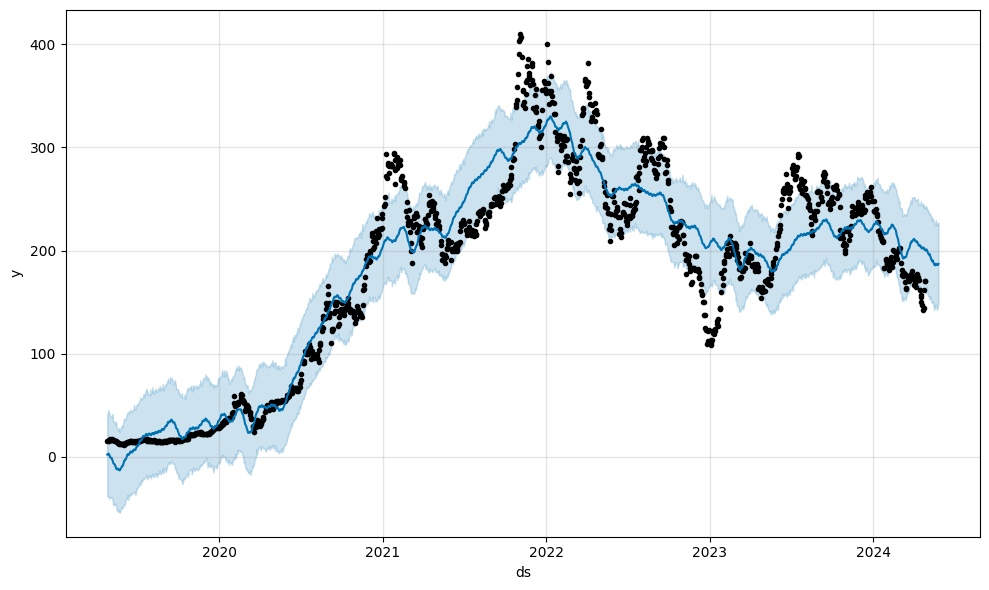

In [26]:
figure = m.plot(forecast, xlabel="ds", ylabel="y") #The black line lines are the actual prices of tesla shares while the blue line is the forecsated price.

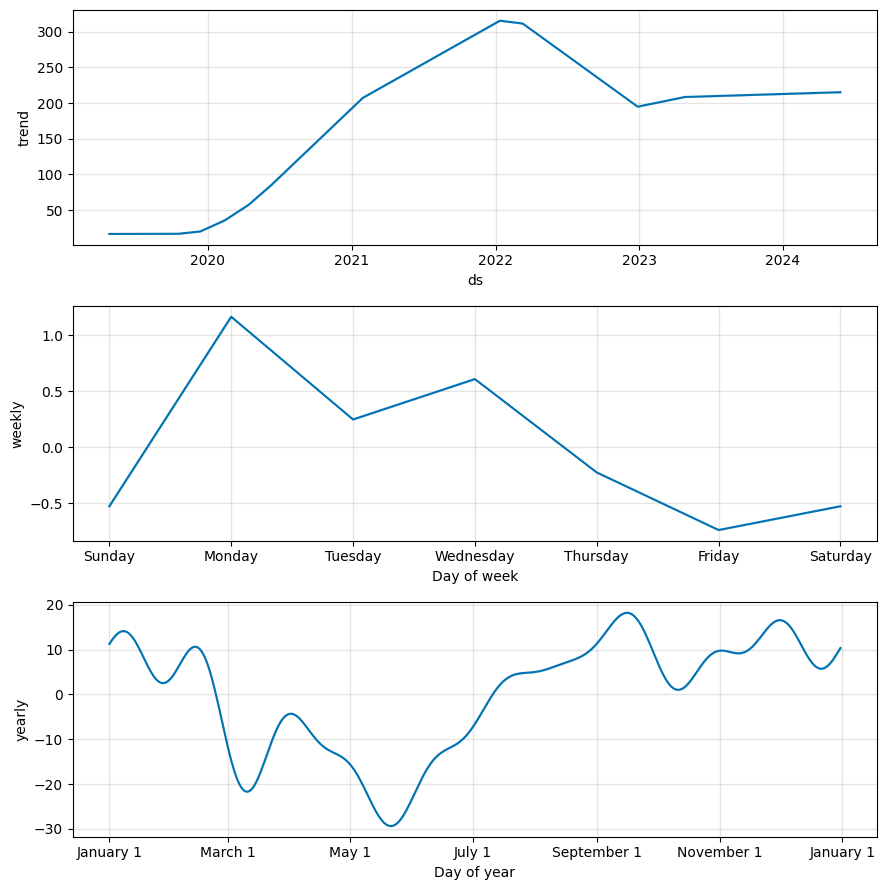

In [27]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [28]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>